In [1]:
import pandas as pd 
import numpy as np 
prs = pd.read_csv(r'all_prs.csv')  # 1、读取原始数据

## prs.csv预处理

### 缺失值检测与处理

In [2]:
import pandas as pd

def find_missing_values_rows(df):
    """
    返回包含缺失值的DataFrame行。
    
    参数:
    df (pd.DataFrame): 需要检查缺失值的DataFrame。
    
    返回:
    pd.DataFrame: 包含至少一个缺失值的所有行。
    """
    # 使用 isnull() 和 any(axis=1) 来检查每行是否有任何缺失值
    missing_rows = df[df.isnull().any(axis=1)]
    return missing_rows 


# 2、检查数据集里缺失的信息

# 缺失数据只发生在这一行，因此可以剔除掉
find_missing_values_rows(prs)


FID        HF  AAM  AMD  AD  AST  AF  BD  BMI  CRC  ...  POAG  PC  \
91417  2363590 -0.408576  NaN  NaN NaN  NaN NaN NaN  NaN  NaN  ...   NaN NaN   

       PSO  RA  SCZ  SLE  T1D  T2D  UC  VTE  
91417  NaN NaN  NaN  NaN  NaN  NaN NaN  NaN  

[1 rows x 38 columns]

In [3]:
prs.dropna(axis=0,inplace=True)

### 离散特征检测
- 检测是否有离散特征的存在

In [4]:
def detect_categorical_columns(df):
    """
    检测DataFrame中所有分类（离散）列。
    
    参数:
    df (pd.DataFrame): 输入的DataFrame。
    
    返回:
    List[str]: 包含所有分类列名的列表。
    """
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    return categorical_columns

detect_categorical_columns(prs)

[]

### 异常值检测

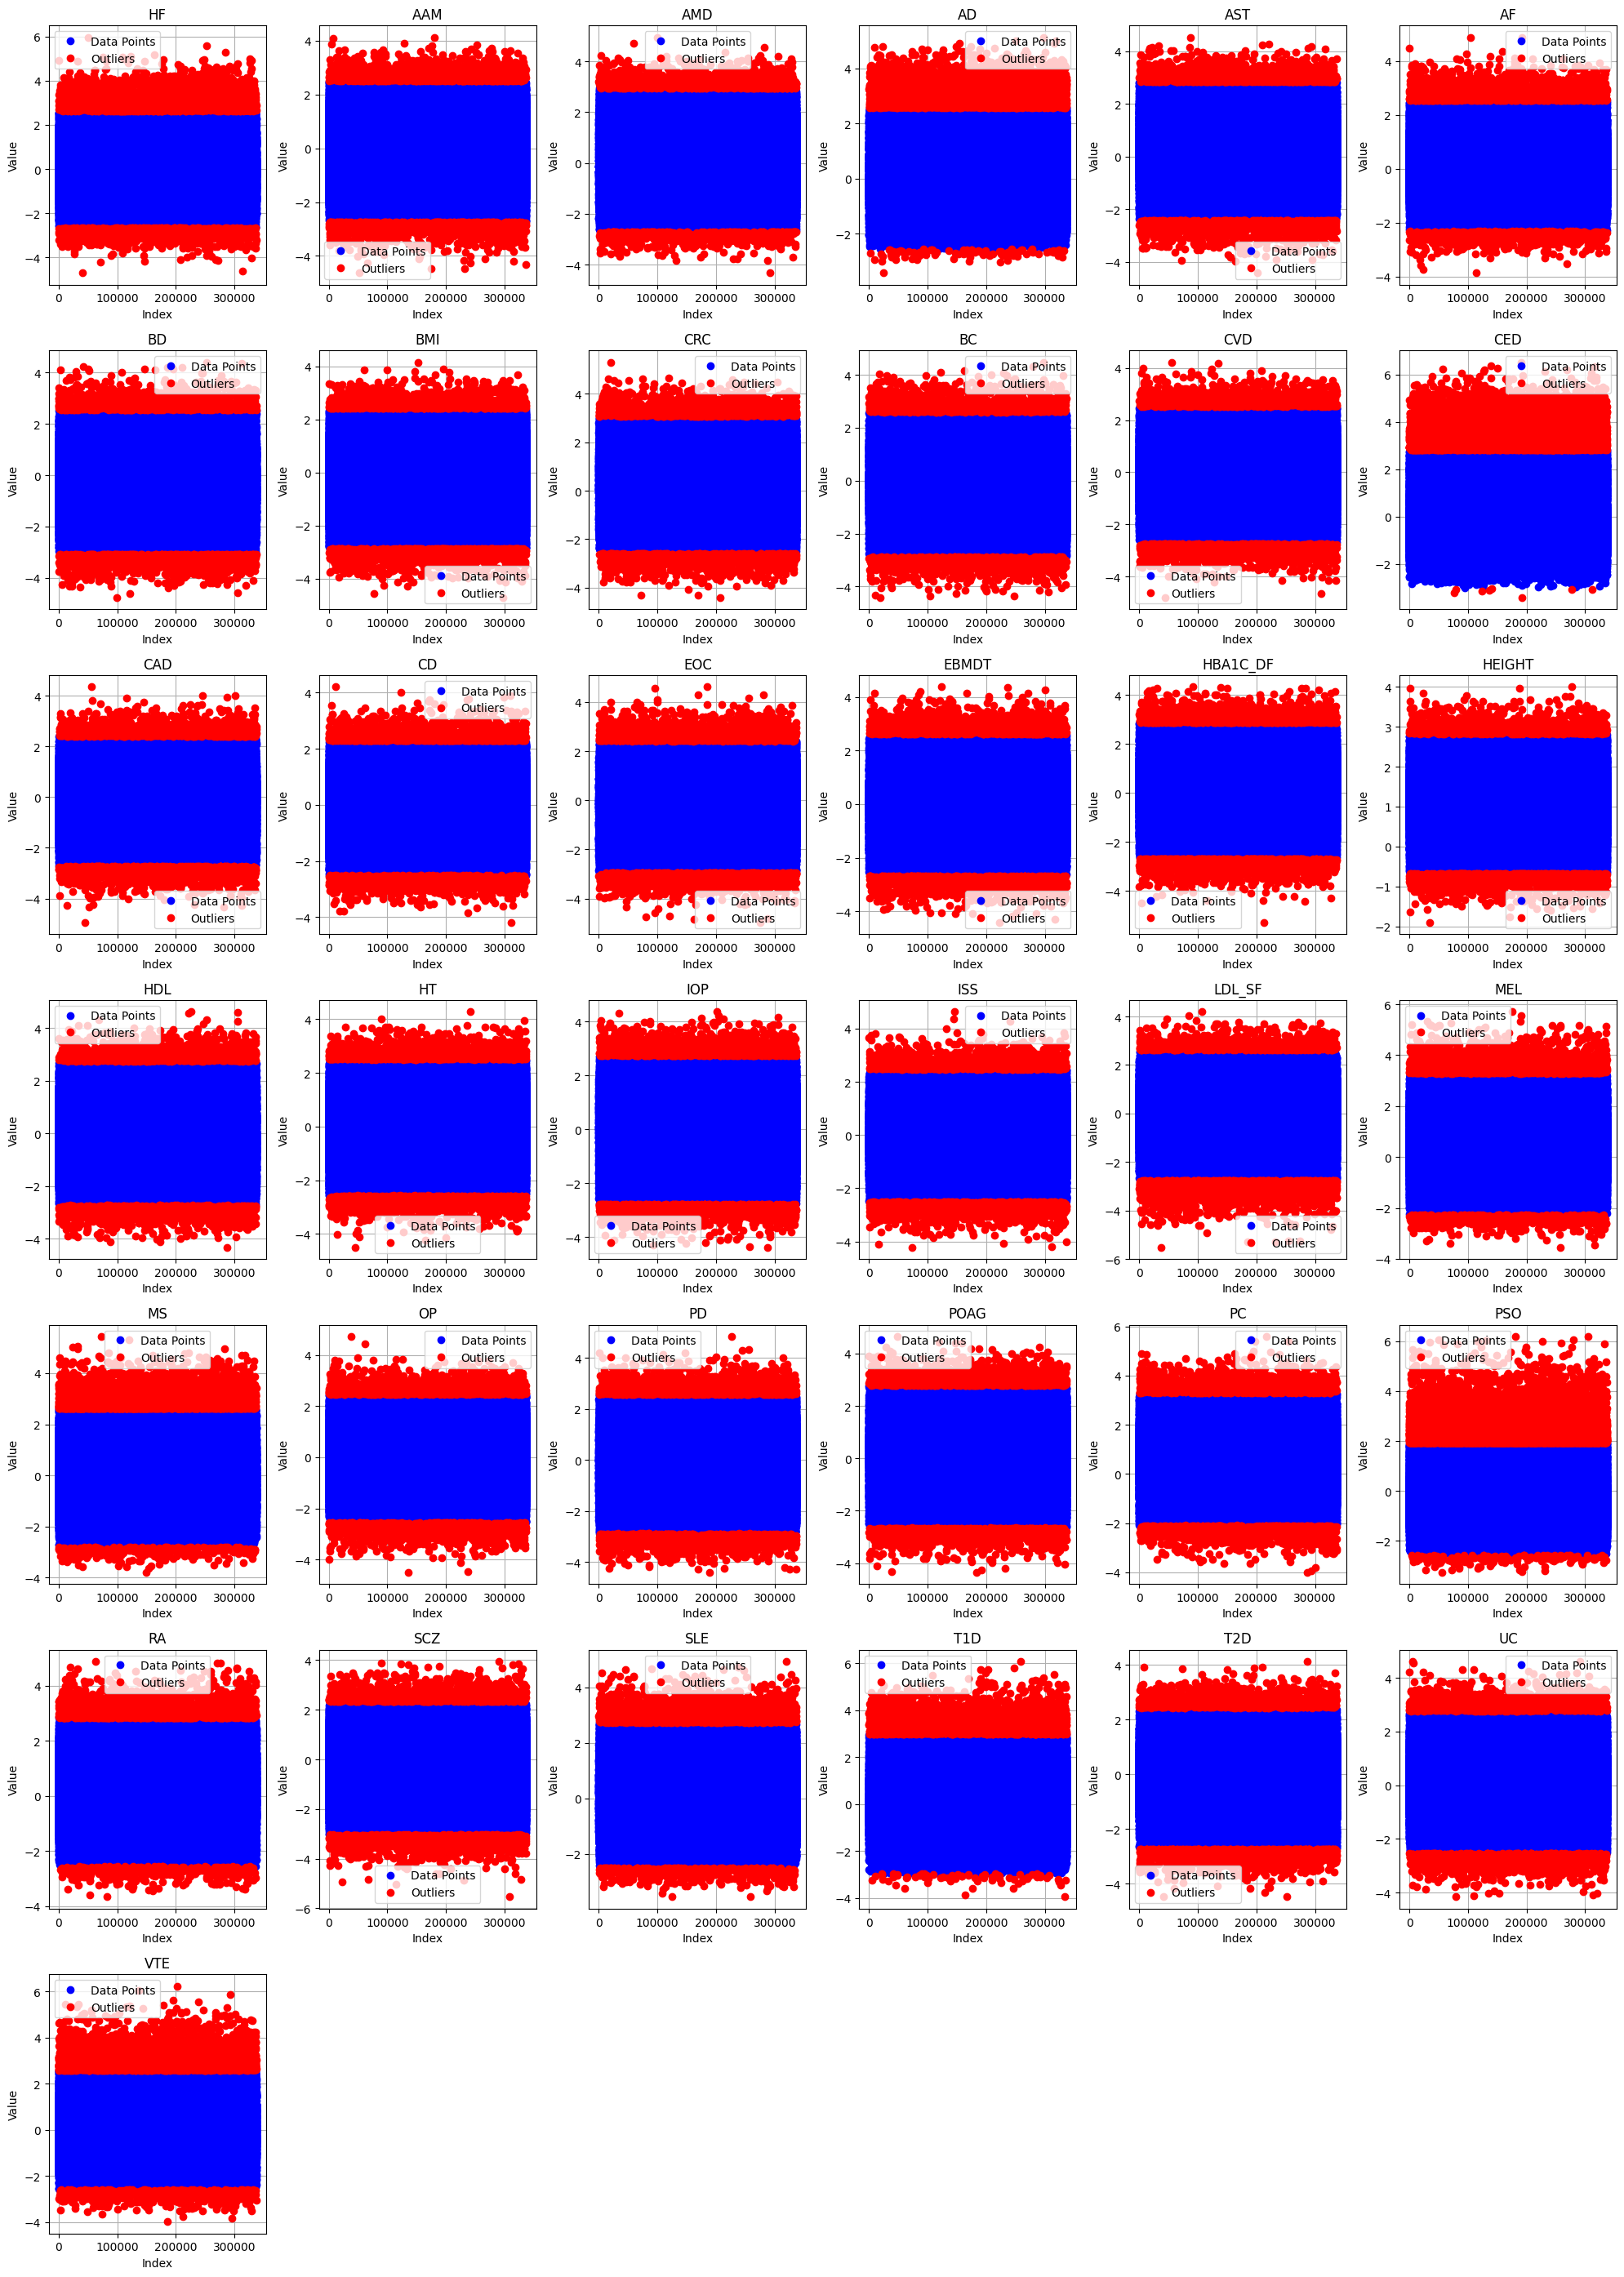

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 使用四分位数方法检测是否有异常值
def detect_outliers_iqr(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

detect_prs = prs.iloc[:,1:] 

# 计算需要的行数和列数
cols_per_row = 6  # 每行显示6个子图
num_cols = len(detect_prs.columns)
num_rows = int(np.ceil(num_cols / cols_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, num_rows * 4), squeeze=False)
axes = axes.flatten()  # 将多维数组转换为一维数组，便于迭代

for i, column in enumerate(detect_prs.columns):
    ax = axes[i]
    # 检测异常值
    outliers_mask = detect_outliers_iqr(detect_prs[column])
    outliers = detect_prs[column][outliers_mask]
    normal_data = detect_prs[column][~outliers_mask]

    # 可视化
    ax.plot(normal_data.index.values, normal_data.values, 'bo', label='Data Points')  # 正常数据点
    ax.plot(outliers.index.values, outliers.values, 'ro', label='Outliers')  # 异常值
    ax.set_title(column)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

# 隐藏多余的空白子图
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# CED、PSO异常值较多，可以考虑后续的传统机器学习算法中剔除掉这列

### 归一化

In [6]:
class Scaler:
    def min_max_scale(self, data):
        """ 最小-最大规范化，将数据规范到 [0, 1] 范围内 """
        min_val = np.min(data)
        max_val = np.max(data)
        return (data - min_val) / (max_val - min_val)

    def z_score_scale(self, data):
        """ Z得分标准化，将数据转换为均值为0，标准差为1 """
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean) / std

In [7]:
mm_prs = Scaler().min_max_scale(prs.iloc[:,1:])
mm_prs[prs.columns[0]] = prs.iloc[:,0]

mm_prs = mm_prs[mm_prs.columns[-1:].tolist() + mm_prs.columns[:-1].tolist()]

In [8]:
mm_prs.to_csv(r'mm_prs.csv',index=False)

## labels.csv预处理

In [9]:
import pandas as pd 


labels = pd.read_csv(r'all_labels.csv')
labels_nid = labels.iloc[:,1:]

In [10]:
find_missing_values_rows(labels)

Empty DataFrame
Columns: [eid, Class_A00, Class_A01, Class_A02, Class_A03, Class_A04, Class_A05, Class_A06, Class_A07, Class_A08, Class_A09, Class_A15, Class_A16, Class_A17, Class_A18, Class_A19, Class_D50, Class_D51, Class_D52, Class_D53, Class_D55, Class_D56, Class_D57, Class_D58, Class_D59, Class_D60, Class_D61, Class_D62, Class_D63, Class_D64, Class_D65, Class_D66, Class_E00, Class_E01, Class_E02, Class_E03, Class_E04, Class_E05, Class_E06, Class_E07, Class_E10, Class_E11, Class_E12, Class_E13, Class_E14, Class_E15, Class_E16, Class_E20, Class_F01, Class_F02, Class_F03, Class_F04, Class_F05, Class_F06, Class_F07, Class_F09, Class_F10, Class_F11, Class_F12, Class_F13, Class_F14, Class_F15, Class_F16, Class_F17, Class_G00, Class_G01, Class_G02, Class_G03, Class_G04, Class_G05, Class_G06, Class_G07, Class_G08, Class_G09, Class_G10, Class_G11, Class_G12, Class_G13, Class_G14, Class_G20, Class_I00, Class_I01, Class_I02, Class_I05, Class_I06, Class_I07, Class_I08, Class_I09, Class_I11, Class_I12, Class_I13, Class_I20, Class_I21, Class_I22, Class_I50, Class_I25, Class_I48, Class_I63, Class_I10, Class_F00, ...]
Index: []

[0 rows x 106 columns]

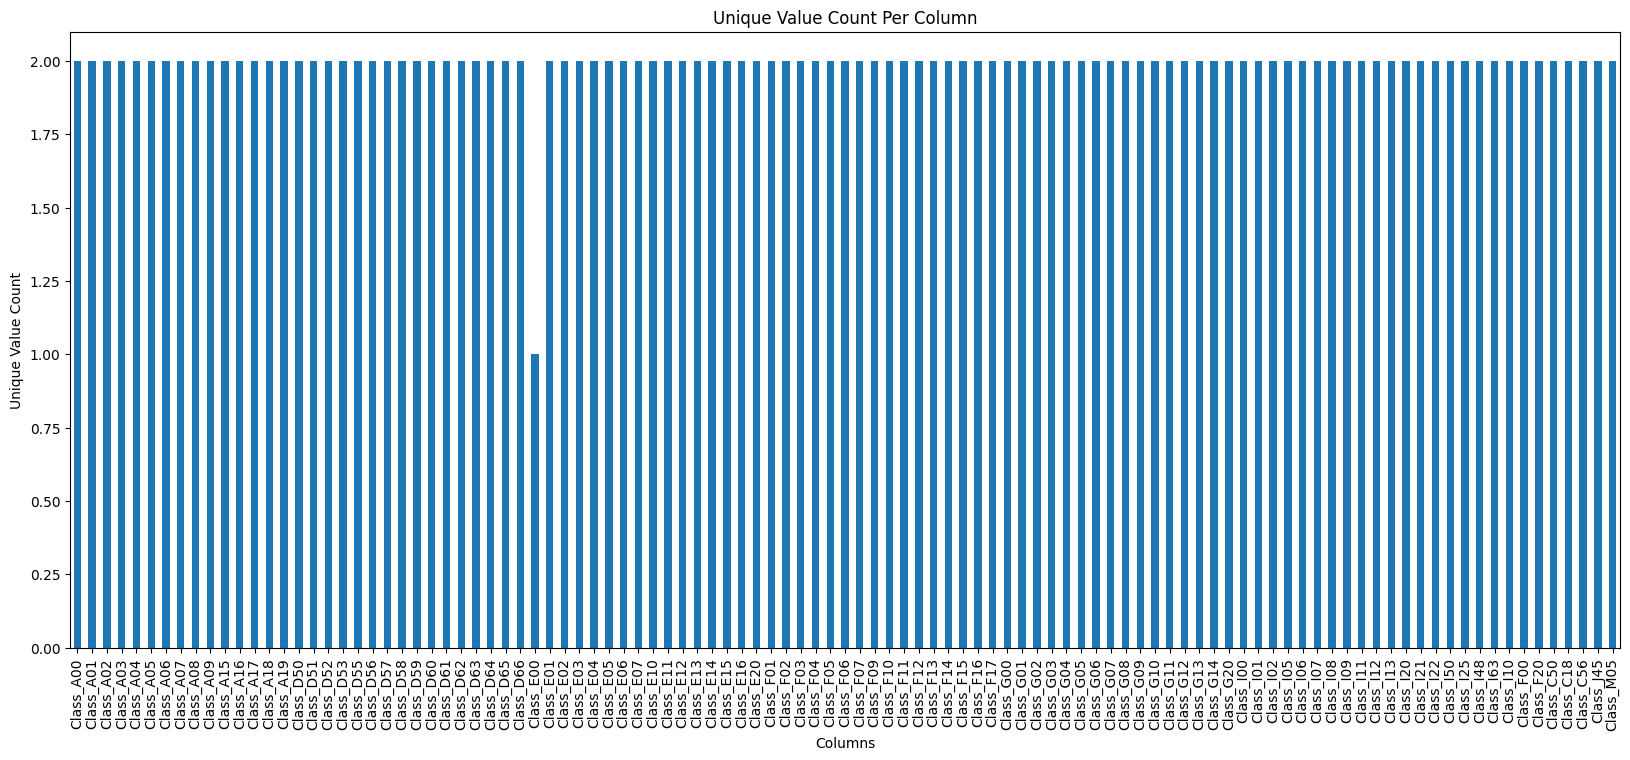

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# 计算每列的唯一值个数
unique_counts = labels_nid.nunique()

# 设置绘图大小
plt.figure(figsize=(20, 8))  # 宽度20英寸，高度8英寸

# 绘制柱状图
unique_counts.plot(kind='bar')

# 设置标题和标签
plt.title('Unique Value Count Per Column')
plt.xlabel('Columns')
plt.ylabel('Unique Value Count')
plt.xticks(rotation=90)  # 将x轴标签旋转90度以避免重叠

# 显示图形
plt.show()


In [12]:
# 这一列可以剔除掉，不需要预测
unique_counts[unique_counts == 1].index

Index(['Class_E00'], dtype='object')

In [13]:
labels.drop('Class_E00',axis=1,inplace=True)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# 设置绘图大小
plt.figure(figsize=(20, 6 * len(labels_nid.columns)))  # 根据列的数量调整高度

# 遍历每列数据
for i, column in enumerate(labels_nid.columns):
    # 计算当前列的值的频率
    counts = labels_nid[column].value_counts()

    # 创建一个新的subplot，每列一个图
    plt.subplot(len(labels_nid.columns), 1, i + 1)  # 为每个特征创建一个子图
    # 绘制柱状图
    counts.plot(kind='bar', color=['blue', 'red'])  # 使用蓝色表示0，红色表示1
    plt.title(f'Frequency of Values in {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)  # 将x轴标签保持水平

# 调整子图之间的间距
plt.tight_layout()
plt.show()


In [15]:
labels['Class_A00'].value_counts()
labels['Class_A17'].value_counts()

Class_A17
0    336967
1        12
Name: count, dtype: int64

In [16]:
labels

eid  Class_A00  Class_A01  Class_A02  Class_A03  Class_A04  \
0       1000011          0          0          0          0          0   
1       1000026          0          0          0          0          0   
2       1000044          0          0          0          0          0   
3       1000058          0          0          0          0          0   
4       1000116          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
336974  6023498          0          0          0          0          0   
336975  6023514          0          0          0          0          0   
336976  6023529          0          0          0          0          0   
336977  6023541          0          0          0          0          0   
336978  6023565          0          0          0          0          0   

        Class_A05  Class_A06  Class_A07  Class_A08  ...  Class_I48  Class_I63  \
0               0          0          0          0  ...          0          0   
1               0          0          0          0  ...          0          0   
2               0          0          0          0  ...          0          0   
3               0          0          0          0  ...          1          0   
4               0          0          0          0  ...          0          0   
...           ...        ...        ...        ...  ...        ...        ...   
336974          0          0          0          0  ...          0          0   
336975          0          0          0          0  ...          1          0   
336976          0          0          0          0  ...          1          0   
336977          0          0          0          0  ...          0          1   
336978          0          0          0          0  ...          0          0   

        Class_I10  Class_F00  Class_F20  Class_C50  Class_C18  Class_C56  \
0               0          0          0          0          0          0   
1               1          0          0          0          0          0   
2               0          0          0          0          0          0   
3               1          0          0          0          0          0   
4               0          0          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
336974          0          0          0          0          0          0   
336975          1          0          0          0          0          0   
336976          0          0          0          0          0          0   
336977          0          0          0          0          0          0   
336978          0          0          0          0          0          0   

        Class_J45  Class_M05  
0               0          0  
1               0          0  
2               0          0  
3               0          0  
4               0          0  
...           ...        ...  
336974          0          0  
336975          0          0  
336976          0          0  
336977          0          0  
336978          1          0  

[336979 rows x 105 columns]

In [17]:
labels.to_csv(r'clean_lables.csv',index=False)